# Electrostatic PIC

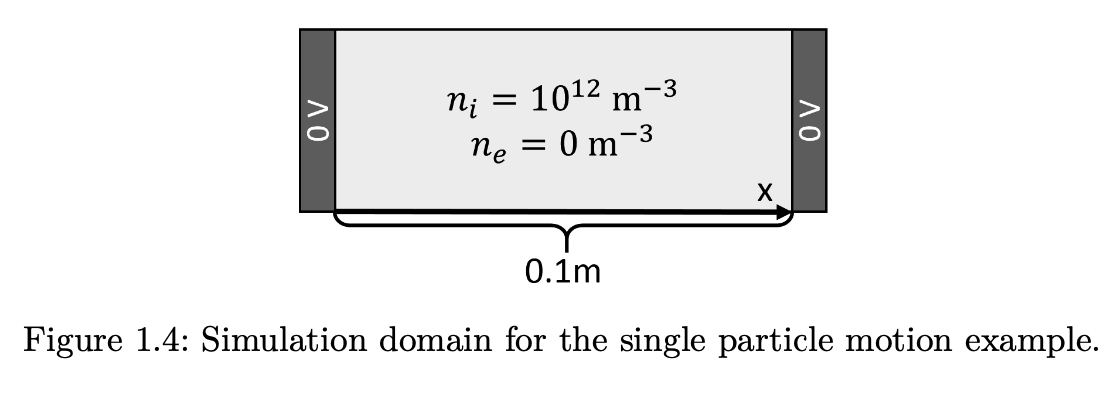

# 1.4. Domain Discretization

In [3]:
# import statements
from scipy.constants import m_e, e, epsilon_0
import numpy as np
import matplotlib.pyplot as plt

In [23]:
# number of mesh nodes
ci = 21
ni = 1e12

# initial potential, charge density, electric field
phi, rho, ef = np.zeros(ci),  np.ones(ci)*e*ni,  np.zeros(ci)

# initialize the positions in the grid
x0 = 0 
L = 0.1 
x = np.zeros(ci)
dx =  L/(ci-1)

for i in range(ci):
    x[i] = (x0 + i * dx ) # number of cells = number of nodes  - 1

In [24]:
print('x [m]:', x)
print('rho:', rho)

x [m]: [0.    0.005 0.01  0.015 0.02  0.025 0.03  0.035 0.04  0.045 0.05  0.055
 0.06  0.065 0.07  0.075 0.08  0.085 0.09  0.095 0.1  ]
rho: [1.60217663e-07 1.60217663e-07 1.60217663e-07 1.60217663e-07
 1.60217663e-07 1.60217663e-07 1.60217663e-07 1.60217663e-07
 1.60217663e-07 1.60217663e-07 1.60217663e-07 1.60217663e-07
 1.60217663e-07 1.60217663e-07 1.60217663e-07 1.60217663e-07
 1.60217663e-07 1.60217663e-07 1.60217663e-07 1.60217663e-07
 1.60217663e-07]


# Finite Difference Method

\begin{equation}
\frac{\phi_{i-1} - 2 \phi_{i} + \phi_{i+1}}{(dx)^2} = -\frac{\rho_i}{\epsilon_0}
\end{equation}

In [30]:
phi = np.zeros(ci)  # Initial guess for potential

# Construct the tridiagonal matrix A
A = np.zeros((ci, ci))
for i in range(1, ci - 1):
    A[i, i - 1] = 1 / dx**2 # this corresponds to the phi_(i-1)
    A[i, i] = -2 / dx**2  # phi_(i) term
    A[i, i + 1] = 1 / dx**2 # phi_(i+1) term

# Apply Dirichlet boundary conditions
A[0, 0] = 1
A[-1, -1] = 1
A[0, 1] = 0
A[-1, -2] = 0

# Construct the right-hand side vector b
b = -rho / epsilon_0
b[0] = 0  # Boundary condition at x=0
b[-1] = 0  # Boundary condition at x=L

# Solve the linear system A * phi = b
phi = np.linalg.solve(A, b)
ef = -np.gradient(phi, x)


Text(0, 0.5, 'E / V/m')

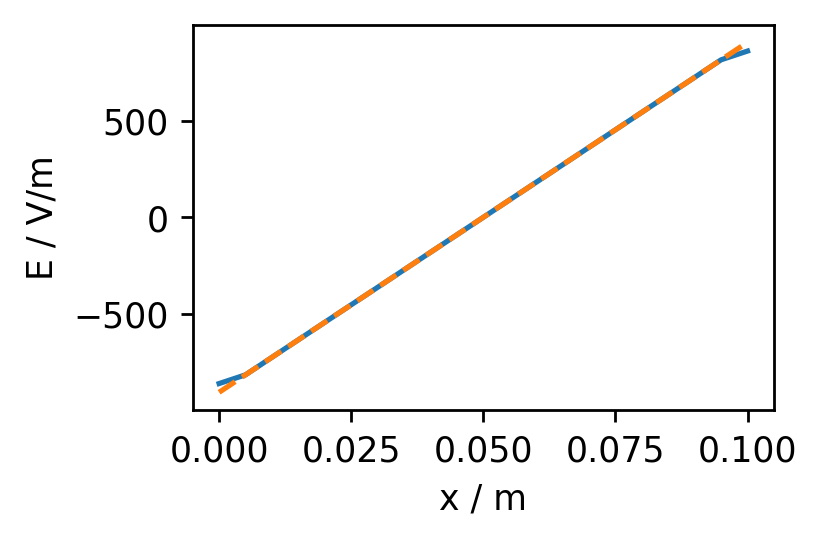

In [36]:
# Analytically, we expect E(x) = rho/eps_0 * (x-L/2)
plt.figure(figsize=(3,2), dpi = 250)
plt.plot(x, ef)
plt.plot(x, rho/epsilon_0 * (x - L/2), linestyle='--')
plt.xlabel('x / m')
plt.ylabel('E / V/m')

# Particle motion (assuming no B field)

In [51]:
nt = 100 # num of timesteps
dt = 0.25e-9 # timestep
E0 = -100 # assume constant E-field
x_test = np.zeros(nt)
x_new = 0 # initial position
v_new = 0 - 0.5 * e / m_e * E0 * dt # stationary
x_particle, v_particle = np.zeros(nt), np.zeros(nt)

for k in range(nt):
    x_new = x_new + v_new * dt
    v_new = v_new - e/m_e *E0 * dt
    x_particle[k] = x_new
    v_particle[k] = v_new
    


Text(0, 0.5, 'v / m/s')

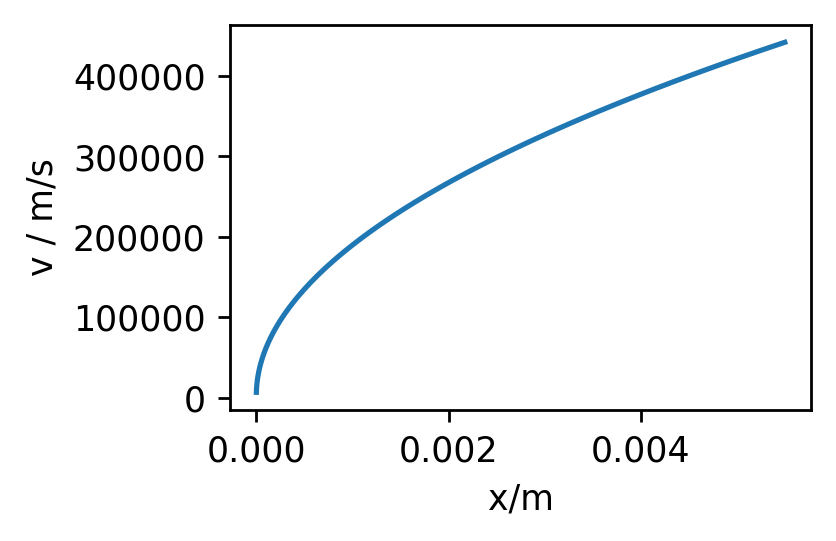

In [52]:
plt.figure(figsize=(3,2), dpi = 250)
plt.plot(x_particle, v_particle)
plt.xlabel('x/m')
plt.ylabel('v / m/s')